# OpenBiomechanicsProject Ground Forces EDA

## Part 1: Exploring and Understanding the Data Better

I wanted to see if I can explore the data better. I could try searching for correlations but without understanding the data and columns itself, All the analysis I can do won't describe what the data tells us. I started to look into the csv file itself first to see how the data is presented (like how swing session tells us the player and their swings, and how the data's showing the change in forces over time in each swings). From working with data similar to this, I realize that it would be hard to correlate all the swings of that many subject. So I decided to look into 5 different swings of different subject to see trends and how the data represents the swing.

Before going into the data, we also need to understand what each variable/column represents. Here are some descriptions:

rear_force_x / lead_force_x:
These components represent horizontal forces, which could influence the rotation of the body and, consequently, joint angular velocities.

rear_force_y / lead_force_y:
Vertical forces might impact the overall body movement and rotation during the swing.

rear_force_z / lead_force_z:
These components represent forces in the direction perpendicular to the ground. They may influence the overall stability and balance during the swing.

see this picture for reference: https://www.researchgate.net/figure/Schematic-of-the-lower-leg-and-force-plate-showing-coordinate-systems-and-heel-point-A_fig1_326055770

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load the force plate data
force_plate = pd.read_csv('force_plate.csv')

# Extract subject and swing number
force_plate[['subject', 'swing_number']] = force_plate['session_swing'].str.split('_', expand=True)

# Convert swing_number to integer (if needed)
force_plate['swing_number'] = force_plate['swing_number'].astype(int)

# Choose 5 random subjects
random_subjects = random.sample(force_plate['subject'].unique().tolist(), 5)

# Choose a random swing for the selected subjects
random_swing = {}
for random_subject in random_subjects:
    # Filter data for the chosen subject
    subject_data = force_plate[force_plate['subject'] == random_subject]
    
    # Get unique swing numbers for the selected subject
    unique_swings = subject_data['swing_number'].unique().tolist()
    
    # Choose a random swing for the selected subject
    random_swing[random_subject] = random.choice(unique_swings)

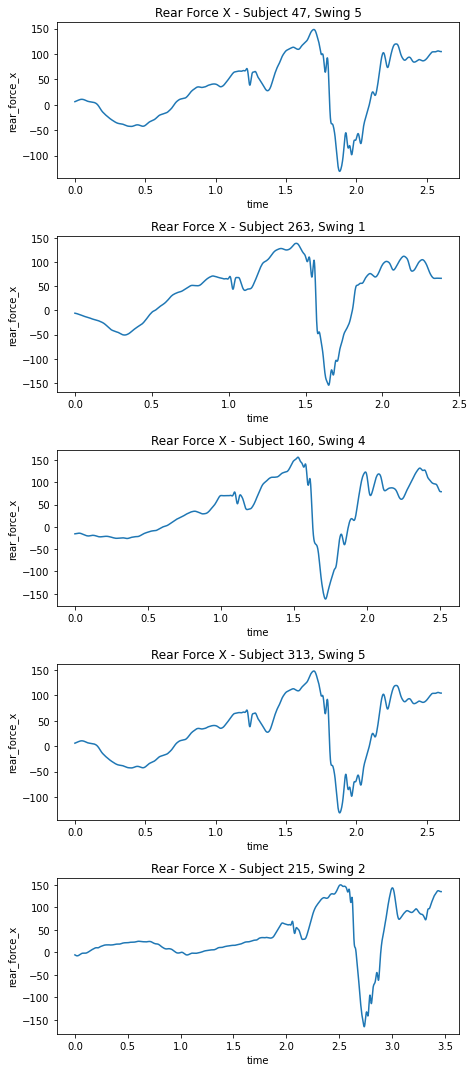

In [23]:
# Visualize Rear Force X for each subject
plt.figure(figsize=(30, 15))

for i, random_subject in enumerate(random_subjects, start=1):
    plt.subplot(5, 5, 5*(i-1) + 1)
    swing_data = subject_data[subject_data['swing_number'] == random_swing[random_subject]]
    sns.lineplot(x='time', y='rear_force_x', data=swing_data)
    plt.title(f'Rear Force X - Subject {random_subject}, Swing {random_swing[random_subject]}')

plt.tight_layout()
plt.show()

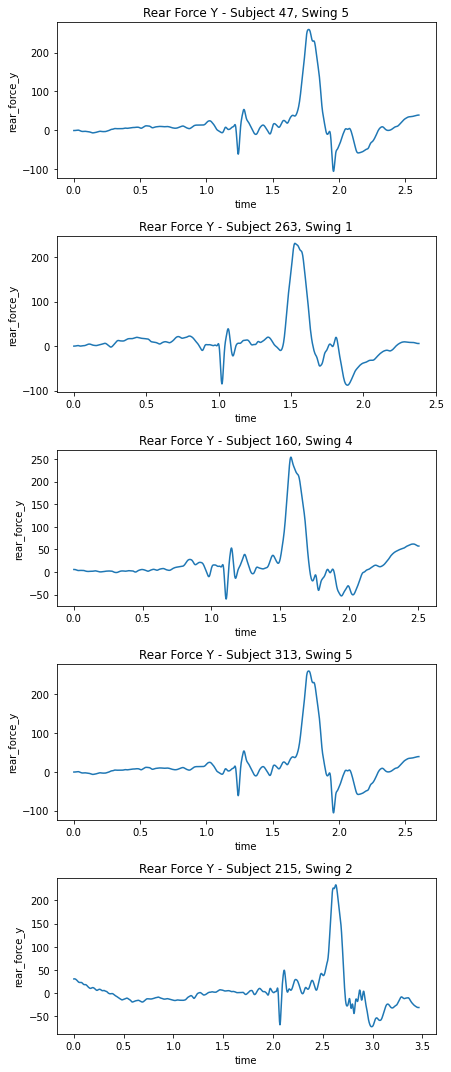

In [24]:
# Visualize Rear Force Y for each subject
plt.figure(figsize=(30, 15))

for i, random_subject in enumerate(random_subjects, start=1):
    plt.subplot(5, 5, 5*(i-1) + 2)
    swing_data = subject_data[subject_data['swing_number'] == random_swing[random_subject]]
    sns.lineplot(x='time', y='rear_force_y', data=swing_data)
    plt.title(f'Rear Force Y - Subject {random_subject}, Swing {random_swing[random_subject]}')

plt.tight_layout()
plt.show()


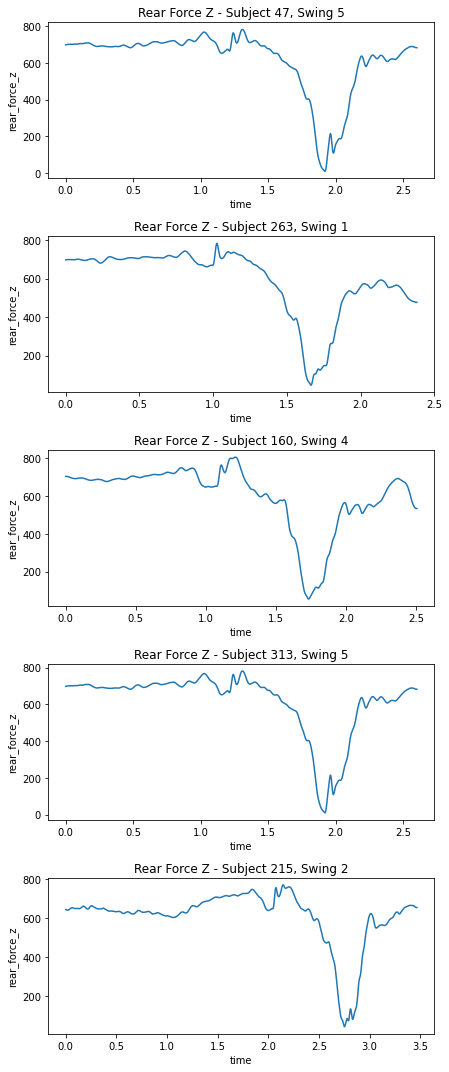

In [25]:
# Visualize Rear Force Z for each subject
plt.figure(figsize=(30, 15))

for i, random_subject in enumerate(random_subjects, start=1):
    plt.subplot(5, 5, 5*(i-1) + 3)
    swing_data = subject_data[subject_data['swing_number'] == random_swing[random_subject]]
    sns.lineplot(x='time', y='rear_force_z', data=swing_data)
    plt.title(f'Rear Force Z - Subject {random_subject}, Swing {random_swing[random_subject]}')

plt.tight_layout()
plt.show()

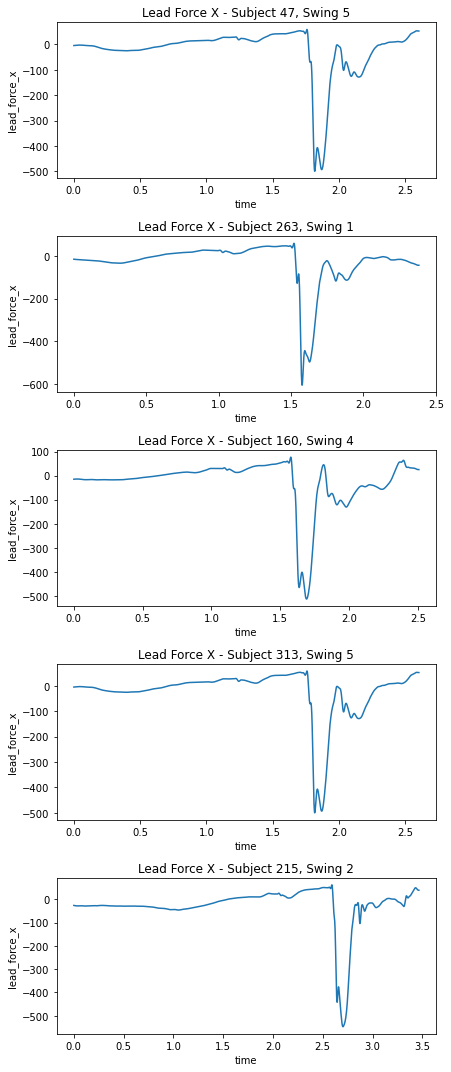

In [26]:
# Visualize Lead Force X for each subject
plt.figure(figsize=(30, 15))

for i, random_subject in enumerate(random_subjects, start=1):
    plt.subplot(5, 5, 5*(i-1) + 4)
    swing_data = subject_data[subject_data['swing_number'] == random_swing[random_subject]]
    sns.lineplot(x='time', y='lead_force_x', data=swing_data)
    plt.title(f'Lead Force X - Subject {random_subject}, Swing {random_swing[random_subject]}')

plt.tight_layout()
plt.show()

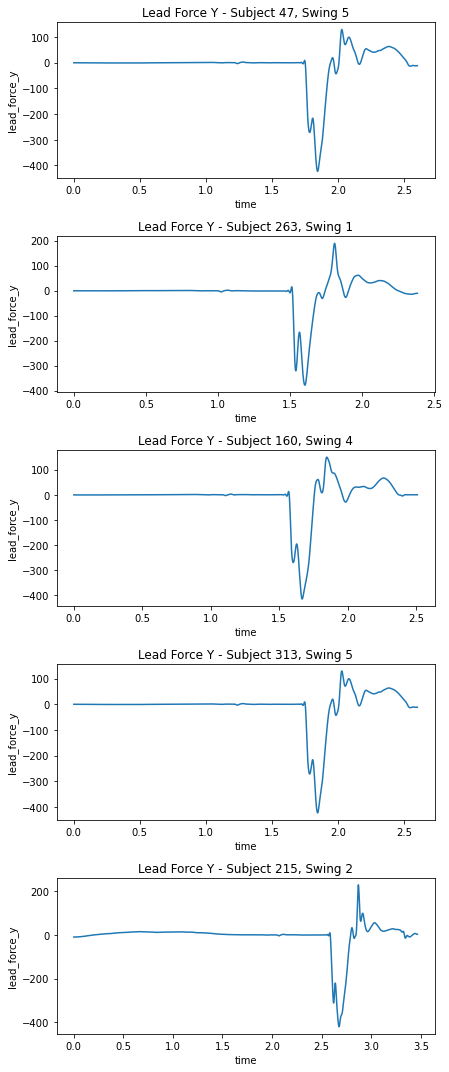

In [27]:
# Visualize Lead Force Y for each subject
plt.figure(figsize=(30, 15))

for i, random_subject in enumerate(random_subjects, start=1):
    plt.subplot(5, 5, 5*(i-1) + 5)
    swing_data = subject_data[subject_data['swing_number'] == random_swing[random_subject]]
    sns.lineplot(x='time', y='lead_force_y', data=swing_data)
    plt.title(f'Lead Force Y - Subject {random_subject}, Swing {random_swing[random_subject]}')

plt.tight_layout()
plt.show()

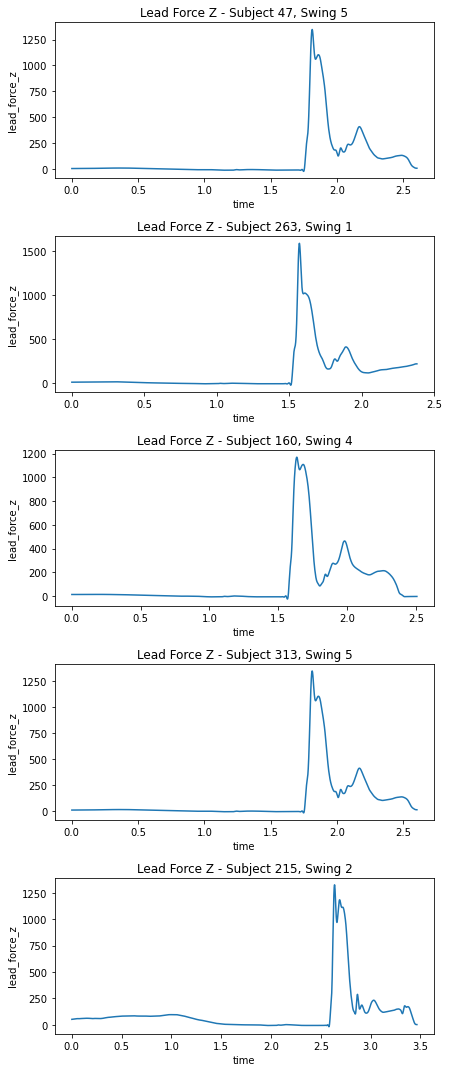

In [28]:
# Visualize Lead Force Z for each subject
plt.figure(figsize=(30, 15))

for i, random_subject in enumerate(random_subjects, start=1):
    plt.subplot(5, 5, 5*(i-1) + 5)
    swing_data = subject_data[subject_data['swing_number'] == random_swing[random_subject]]
    sns.lineplot(x='time', y='lead_force_z', data=swing_data)
    plt.title(f'Lead Force Z - Subject {random_subject}, Swing {random_swing[random_subject]}')

plt.tight_layout()
plt.show()

Graph Analysis:

Had to run the codes a couple of times to see changes of the graph and see consistent graphs.

Rear Force has positive force that turns into negative, while lead force has negative force that turns into positive. It's important to know so we can picture the data with the swing components.

Rear force X: back foot stays grounded until the turn. A trough can mean that a person's foot is off the ground (hips firing and possible mini scissor too). Force going down in the beginning can also mean the pressure is on the back half of the foot (happens when we load back).

Rear force Y: Foot provides the most force in the y direction when turning and scissoring.Foot stays stationary but then applies force in the back foot the most when the swing unfolds.

Rear force Z: It's possible that the force starts high due to the weight transfer between the rear and lead leg. It goes to 0 possibly when weight is transferred to the lead foot. Could also be the foot being off the ground.

Lead force X: Front foot could have a leg kick which may be why it starts at 0. The through could be when the hitter transfers their weight when they rotate.

Lead force Y: Could represent where the lead leg and hitter's weight shift (front or back).

Lead force Z: Same as rear force, it might be due to weight shift that it starts at 0 (leg kick). It increases due to weight pushing on the ground when the hitter rotates.

rear_force_x / lead_force_x (Horizontal Direction):

Positive peaks might represent the point where the foot is pushing or moving towards the pitcher, generating force in that direction.
Negative peaks could indicate the foot moving away from the pitcher or a shift in weight towards the back foot.

rear_force_y / lead_force_y (Vertical Direction):

Positive peaks could represent instances where there is an upward force, possibly associated with the foot lifting or weight transferring towards the front foot.
Negative peaks may signify downward force, such as during foot plant or applying pressure to the ground.

rear_force_z / lead_force_z (Perpendicular to the Ground):

Positive peaks might indicate forces pushing down into the ground, possibly during foot plant or generating stability.
Negative peaks could suggest forces lifting away from the ground.

Next step is to determine how to integrate the force data with the joint velo data. Or maybe explore the velo data too.

Citation:

Wasserberger KW, Brady AC, Besky DM, Jones BR, Boddy KJ. The OpenBiomechanics Project: The open source initiative for anonymized, elite-level athletic motion capture data. (2022).